# Це помітки коду на пам'ять/
### не треба його запускати

In [ ]:
# фільтр за допогою лок
desktop_data = metrica_df.loc[metrica_df.loc[:,'device_type'] == 'desktop']

# фільтр іншим методом
mobile_data = metrica_df[metrica_df['device_type'] == 'mobile']

In [ ]:
# В методу  to_numeric() є параметр errors. 
# `errors='raise' — дефолтне: при зустрічі з некоректним значенням видає помилку,
#  операція переривається;
# `errors='coerce' — некоректні значення примусово замінюються на NaN;
# `errors='ignore' — некоректні значення ігноруються але залишаються.
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')


# ще один варіант змінити тип даних в стовпці
data['visits'] = data['visits'].astype('int')

In [ ]:
# заміна типу дати 01.04.2019Z11:03:00  (Z - стандартний роздільник його залишаємо.)
arrivals['date_datetime'] = pd.to_datetime(arrivals['date'], format='%d.%m.%YZ%H:%M:%S')

# 2019-04-01Z11:00:00 == '%Y-%m-%dZ%H:%M:%S'

# Метод to_datetime() працює також з форматом unix time. 
# Перший аргумент — це стовпець unix time, 
# другий аргумент unit зі значенням 's'

In [ ]:
# місяць із дати за допомогою DatetimeIndex
arrivals['month'] = pd.DatetimeIndex(arrivals['date_datetime']).month

In [3]:
# try-except 
position = [
['2019-05-01', '- 6'],
['2019-05-02', '+5'],
['2019-05-03', ' 5'],
['2019-05-04', '4'],
['2019-05-05', '5'],
['2019-05-06', '5'],
['2019-05-07', '4'],
['2019-05-08', 'Error 5'],
['2019-05-09', '3'],
['2019-05-10', '3'],
]
total_position = 0
count_lines = 0
wrong_lines_content = []

for row in position:
    try:
        count_lines += 1
        level = int(row[1])
        total_position += level
    except:
        wrong_lines_content.append(row)
        
print(f'Кількість замірів {count_lines}')
print(f'Некоректні строки {wrong_lines_content}')



Кількість замірів 10
Некоректні строки [['2019-05-01', '- 6'], ['2019-05-08', 'Error 5']]


Метод merge()

In [ ]:
# аналог джоіна
data_subcategory = data.merge(subcategory_dict, on='subcategory_id', how='left')

pivot_table()

In [ ]:
data_pivot = data_final.pivot_table(index=['category_name', 'subcategory_name'], 
                                    columns='source', values='visits', aggfunc='sum')

### Пошук дублікатів

In [ ]:
# duplicated()
data['item'].duplicated().sum()

# value_counts()
data['item'].value_counts()

Приклад очистки від дублів

In [ ]:

# якщо Смартфон Xiaomi Redmi 6A 16GB дублюється в таблиці то треба:
# Порахувати кількість конкретного товару на складі і зберегти цю кількість
xiaomi = stock[stock['item'] == 'Смартфон Xiaomi Redmi 6A 16GB']['count'].sum()

# за допомогою drop_duplicates() видалити дублікати, але замість дублів з'являться NaN
stock['item'] = stock['item'].drop_duplicates()
# видалимо пропуски і перезапишемо індекси 
stock = stock.dropna().reset_index(drop = True)
# Замінимо дані в новій таблиці на збережену нами кількість 
stock.loc[0, 'count',] = xiaomi

Стемминг -
пошук знаходження основи для слова

In [2]:

from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')

queries = ["эпл айфоны", 
           "купить эпл телефон", 
           "лучшие смартфоны",
           "барон фон",
           "смартфон эпл айфон",
           "смартфоны 2019", 
           "эплан", 
           "фоновая музыка", 
           "эпл айфоны икс", 
           "эпл айфон 64гб",
           "фон для фото",
           "купить эпл",
           "эпл айфон купить",
           "эплеренон купить", 
           "смартфон где купить", 
           "эплан показания", 
           "смартфон huawei",
           "эпл"]

for query in queries:
    for word in query.split(' '):
        stemmed_word = russian_stemmer.stem(word)
        if stemmed_word == 'эпл':
            print(query)



эпл айфоны
купить эпл телефон
смартфон эпл айфон
эпл айфоны икс
эпл айфон 64гб
купить эпл
эпл айфон купить
эпл


Лематизація - приводимо слово до базового значення. 
pymorphy2(до python 3.5)(ru, ua) і PyMystem3(лише ru)

In [ ]:
from pymystem3 import Mystem
m = Mystem() 

text = """
“За свою кар’єру я пропустив понад 9000 кидків, програв майже 300 ігор. 
26 раз мені довіряли зробити фінальний переможний кидок, і я промахувався. 
Я зазнавав поразок знову, і знову, і знову. 
І саме тому я домігся успіху.”, – Майкл Джордан.
"""

lemmas = m.lemmatize(text)
print(lemmas)

# приклад для датафрейму
# feedback = pd.read_csv('/datasets/feedback.csv')
# m = Mystem()
# lemmas = m.lemmatize(feedback.text[1])
# print(Counter(lemmas))

['\n', '“', 'за', ' ', 'свой', ' ', 'кара', '’', 'єру', ' ', 'я', ' ', 'пропускать', ' ', 'понада', ' ', '9000', ' ', 'кидків', ', ', 'прогрывать', ' ', 'майже', ' ', '300', ' ', 'ігор', '.', ' \n', '26', ' ', 'раз', ' ', 'мені', ' ', 'довіряли', ' ', 'зробить', ' ', 'фінальний', ' ', 'переможний', ' ', 'кидка', ', ', 'і', ' ', 'я', ' ', 'промахувався', '.', ' \n', 'я', ' ', 'зазнавать', ' ', 'поразок', ' ', 'знов', ', ', 'і', ' ', 'знов', ', ', 'і', ' ', 'знов', '.', ' \n', 'І', ' ', 'сам', ' ', 'то', ' ', 'я', ' ', 'домігся', ' ', 'успіху', '.', '”, – ', 'майкл', ' ', 'джордан', '.', '\n']


In [7]:
# порахуємо кількість входжень кожного слова
from collections import Counter
print(Counter(lemmas)) 

Counter({' ': 30, '.': 5, 'я': 4, ', ': 4, ' \n': 3, 'і': 3, 'знов': 3, '\n': 2, '“': 1, 'за': 1, 'свой': 1, 'кара': 1, '’': 1, 'єру': 1, 'пропускать': 1, 'понада': 1, '9000': 1, 'кидків': 1, 'прогрывать': 1, 'майже': 1, '300': 1, 'ігор': 1, '26': 1, 'раз': 1, 'мені': 1, 'довіряли': 1, 'зробить': 1, 'фінальний': 1, 'переможний': 1, 'кидка': 1, 'промахувався': 1, 'зазнавать': 1, 'поразок': 1, 'І': 1, 'сам': 1, 'то': 1, 'домігся': 1, 'успіху': 1, '”, – ': 1, 'майкл': 1, 'джордан': 1})


Категоризація даних

In [11]:
import pandas as pd
support = pd.read_csv('./data/support.csv')

support.head()

,user_id,Тип обращения,type_id,Время обращения
0,DNcd8dnS,Жалоба на товар в магазине,3,2019-03-28 13:58:24
1,0e9MvwGs,Мошенничество,5,2019-03-08 17:11:59
2,boyDUG4C,Мошенничество,5,2019-03-03 17:52:34
3,5jMA27s1,Жалоба на товар в магазине,3,2019-03-16 15:18:21
4,wvtyctOK,Накрутка отзывов,2,2019-03-13 14:43:14


In [16]:
support = support.set_axis(['user_id','type_message','type_id', 'timestamp'], axis='columns')
support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       3000 non-null   object
 1   type_message  3000 non-null   object
 2   type_id       3000 non-null   int64 
 3   timestamp     3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [18]:
support['timestamp'] = pd.to_datetime(support['timestamp'], format='%Y-%m-%d %H:%M:%S')
support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       3000 non-null   object        
 1   type_message  3000 non-null   object        
 2   type_id       3000 non-null   int64         
 3   timestamp     3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 93.9+ KB


In [19]:
support['type_message'].value_counts()

type_message
Жалоба на товар в магазине      606
Мошенничество                   586
Продажа поддельной продукции    312
Не работает сайт                311
Продажа запрещенных товаров     303
Накрутка отзывов                302
Жалоба на видеообзор            297
Отзыв удалён                    283
Name: count, dtype: int64

In [20]:
support_log = support[['user_id','type_id', 'timestamp']]
support_log.head()

,user_id,type_id,timestamp
0,DNcd8dnS,3,2019-03-28 13:58:24
1,0e9MvwGs,5,2019-03-08 17:11:59
2,boyDUG4C,5,2019-03-03 17:52:34
3,5jMA27s1,3,2019-03-16 15:18:21
4,wvtyctOK,2,2019-03-13 14:43:14


In [23]:
support_dict = support[['type_message', 'type_id']].drop_duplicates().reset_index(drop=True)
support_dict.sort_values(by='type_id').head(10)

,type_message,type_id
4,Не работает сайт,1
2,Накрутка отзывов,2
0,Жалоба на товар в магазине,3
6,Продажа поддельной продукции,4
1,Мошенничество,5
5,Продажа запрещенных товаров,6
7,Отзыв удалён,7
3,Жалоба на видеообзор,8


In [30]:

support_log_grouped = support_log.groupby('type_id').count()
support_log_grouped.head(12)

,user_id,timestamp
type_id,,
1,311,311
2,302,302
3,606,606
4,312,312
5,586,586
6,303,303
7,283,283
8,297,297


In [27]:
def alert_group(message):
    """функція оцінює пріорітет зверненнь
        користувачів"""
    if message <= 300:
        return 'Середній'
    elif message <= 500:
        return 'Високий'
    else:
        return 'Критичний'
    
alert_group(501)

'Критичний'

In [31]:
support_log_grouped['alert_group'] = support_log_grouped['user_id'].apply(alert_group)
support_log_grouped.head(12)

,user_id,timestamp,alert_group
type_id,,,
1,311,311,Високий
2,302,302,Високий
3,606,606,Критичний
4,312,312,Високий
5,586,586,Критичний
6,303,303,Високий
7,283,283,Середній
8,297,297,Середній


In [36]:
support_log_grouped.groupby('alert_group').sum()

,user_id,timestamp
alert_group,,
Високий,1228,1228
Критичний,1192,1192
Середній,580,580


In [49]:
support_log_grouped = pd.read_csv('./data/support_log_grouped.csv')
support_log_grouped.alert_group.value_counts() 

alert_group
высокий      4
критичный    2
средний      2
Name: count, dtype: int64

In [50]:

def alert_group_importance(row):
    
    importance = row['importance']
    alert_group = row['alert_group']
    
    if alert_group=='средний': 
        if importance ==1: 
            return 'Звернути увагу'
    if alert_group=='высокий': 
        if importance == 1: 
            return 'Високий ризик'
    if alert_group=='критичный': 
        if importance== 1: 
            return 'блокер'
    return 'В порядку черги'
       

# перевірка функції
row_values = ['Високий', 1]
row_columns = ['alert_group','importance']
row = pd.Series(data=row_values, index=row_columns)
alert_group_importance(row)

'В порядку черги'

In [53]:
support_log_grouped['importance_status'] = support_log_grouped.apply(alert_group_importance, axis=1)

support_log_grouped.head(12)

,type_id,user_id,timestamp,alert_group,importance,importance_status
0,1,311,311,высокий,1,Високий ризик
1,2,302,302,высокий,0,В порядку черги
2,3,606,606,критичный,0,В порядку черги
3,4,312,312,высокий,1,Високий ризик
4,5,586,586,критичный,1,блокер
5,6,303,303,высокий,1,Високий ризик
6,7,283,283,средний,1,Звернути увагу
7,8,297,297,средний,0,В порядку черги


In [54]:
support_log_grouped.groupby('importance_status').sum()[['user_id']]

,user_id
importance_status,
В порядку черги,1205
Високий ризик,926
Звернути увагу,283
блокер,586


In [55]:
support_log_grouped['importance_status'].value_counts()

importance_status
Високий ризик      3
В порядку черги    3
блокер             1
Звернути увагу     1
Name: count, dtype: int64

array([[<Axes: title={'center': '0'}>]], dtype=object)

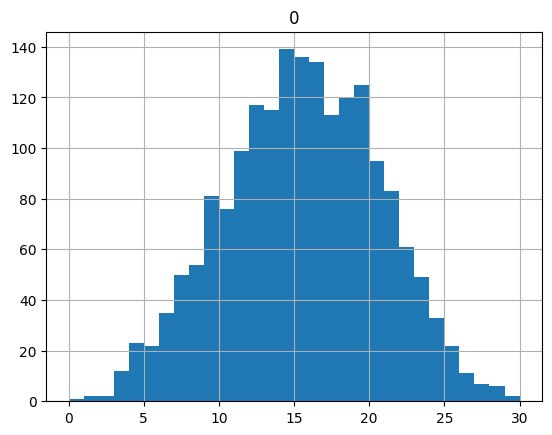

In [21]:
import random
import pandas as pd


# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)

# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)

# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (bus_wait_time() + 
            train_wait_time() + 
            train_wait_time() + 
            bus_wait_time())

# создайте пустой список
days = []

for i in range(365 * 5):
    delay = total_delay()
    days.append(delay)
    # добавьте опоздание в список days
    

# превращаем список в DataFrame
df_days = pd.DataFrame(days)
df_days.hist(bins=30)

In [22]:

df = pd.DataFrame({
    'From': [
        'Moscow', 'Moscow', 'St. Petersburg', 'St. Petersburg', 'St. Petersburg'
    ], 
    'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
    'Is_Direct': [False, True, False, False, True],
    'Has_luggage': [True, False, False, True, False],
    'Price': [21032, 19250, 19301, 20168, 31425],
    'Date_From': [
        '01.07.19', '01.07.19', '04.07.2019', '03.07.2019', '05.07.2019'
    ],
    'Date_To': [
        '07.07.19', '07.07.19', '10.07.2019', '09.07.2019', '11.07.2019'
    ],
    'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
    'Travel_time_from': [995, 230, 605, 365, 255],
    'Travel_time_to': [350, 225, 720, 355, 250],
})
df[df['Price'] < df['Price'].max()/1.5] # впишите нужное условие

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355


In [24]:
df[(df['Travel_time_from'] >= 365) | (df['Travel_time_to'] < 250)]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355


In [25]:
df[(df['Is_Direct'] == False) & (~df['Date_To']\
                                 .isin(('09.07.2019', '10.07.2019', '11.07.2019')))]

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350


In [26]:
df.query('To == "Barcelona"')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [27]:
df.query('Is_Direct == True or Has_luggage == True')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [28]:
df.query('Is_Direct == True | Has_luggage == True')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [29]:

df.query('From == "Moscow" and (Is_Direct == True or Has_luggage == True)')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
0,Moscow,Rome,False,True,21032,01.07.19,07.07.19,Belavia,995,350
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225


In [30]:
df.query('Travel_time_from < 2 * Travel_time_to ')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [31]:
df.query('Travel_time_from < Travel_time_to.mean()') 

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
3,St. Petersburg,Barcelona,False,True,20168,03.07.2019,09.07.2019,Swiss,365,355
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250


In [32]:
# @ - перед переменною
maximum_price = 20000
df.query('Price <= @maximum_price') 

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720


In [34]:
df.query('Has_luggage == False and Airline != "S7" and Airline != "Rossiya"')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
2,St. Petersburg,Rome,False,False,19301,04.07.2019,10.07.2019,Finnair,605,720


In [36]:
max_time = 300
df.query('Airline in ("Belavia", "S7", "Rossiya") and Travel_time_from < @max_time')

,From,To,Is_Direct,Has_luggage,Price,Date_From,Date_To,Airline,Travel_time_from,Travel_time_to
1,Moscow,Rome,True,False,19250,01.07.19,07.07.19,S7,230,225
4,St. Petersburg,Barcelona,True,False,31425,05.07.2019,11.07.2019,Rossiya,255,250
